In [7]:
#Import Packages and dataframe:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'c:\Fitness_Club_Data.csv')

In [8]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0


In [9]:
# Checking for Missing Values in Data and dropping Null Values:

df = df[df['age'] != 0]


df.reset_index(drop=True, inplace=True)

df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,20210304,1279.3200,105.00,2.62,DirectDebit,1,1,0,0
1,20210304,1317.7500,42.84,8.00,Cheque,1,1,0,0
2,20210315,1094.5200,105.00,7.87,CreditCard,4,1,1,0
3,20210324,950.9472,168.00,6.00,CreditCard,3,1,0,0
4,20191219,262.0800,262.08,96.00,Cash,1,2,0,0


In [ ]:
#Dropping all Values where age = 0

df = df[df['age'] != 0]

df.reset_index(drop=True, inplace=True)

df.head()

In [10]:
#Overview of Data Types and Non-null Values:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   enrolldt  23705 non-null  int64  
 1   price     23705 non-null  float64
 2   downpmt   23705 non-null  float64
 3   monthdue  23705 non-null  float64
 4   pmttype   23705 non-null  object 
 5   use       23705 non-null  int64  
 6   age       23705 non-null  int64  
 7   gender    23705 non-null  int64  
 8   default   23705 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB
None


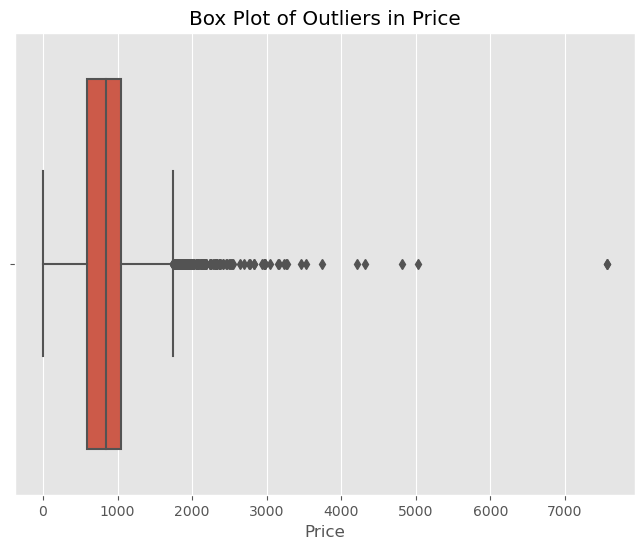

In [32]:
#Boxplot for Outliers in Price: 

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Outliers in Price')
plt.xlabel('Price')
plt.show()


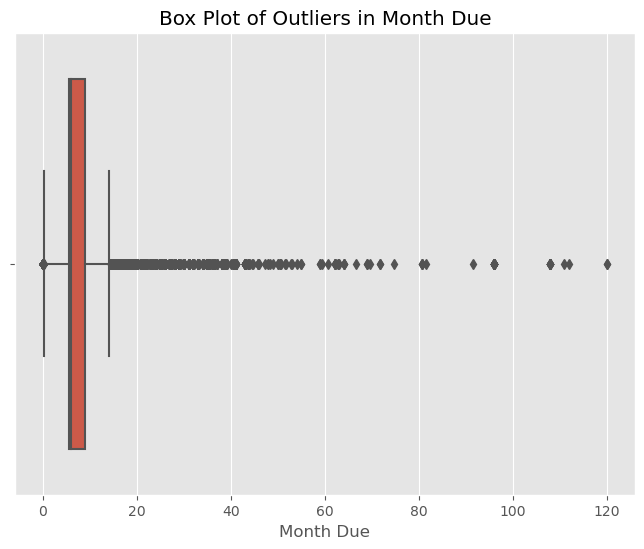

In [33]:
#Boxplot for Outliers in monthdue:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['monthdue'])
plt.title('Box Plot of Outliers in Month Due')
plt.xlabel('Month Due')
plt.show()


In [12]:
#Converting Date to datetime:

df['enrolldt'] = pd.to_datetime(df['enrolldt'], format='%Y%m%d')

df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,2021-03-04,1279.3200,105.00,2.62,DirectDebit,1,1,0,0
1,2021-03-04,1317.7500,42.84,8.00,Cheque,1,1,0,0
2,2021-03-15,1094.5200,105.00,7.87,CreditCard,4,1,1,0
3,2021-03-24,950.9472,168.00,6.00,CreditCard,3,1,0,0
4,2019-12-19,262.0800,262.08,96.00,Cash,1,2,0,0


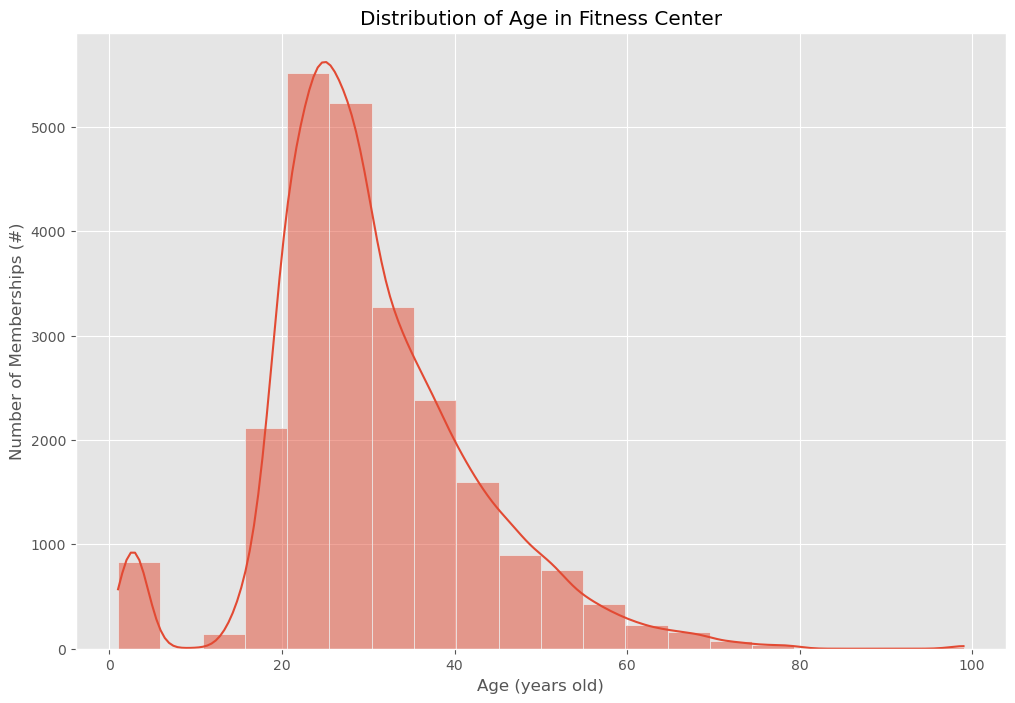

In [17]:
#Seaborn plot of Age Distribution:

sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age in Fitness Center')
plt.xlabel('Age (years old)')
plt.ylabel('Number of Memberships (#)')
plt.show()

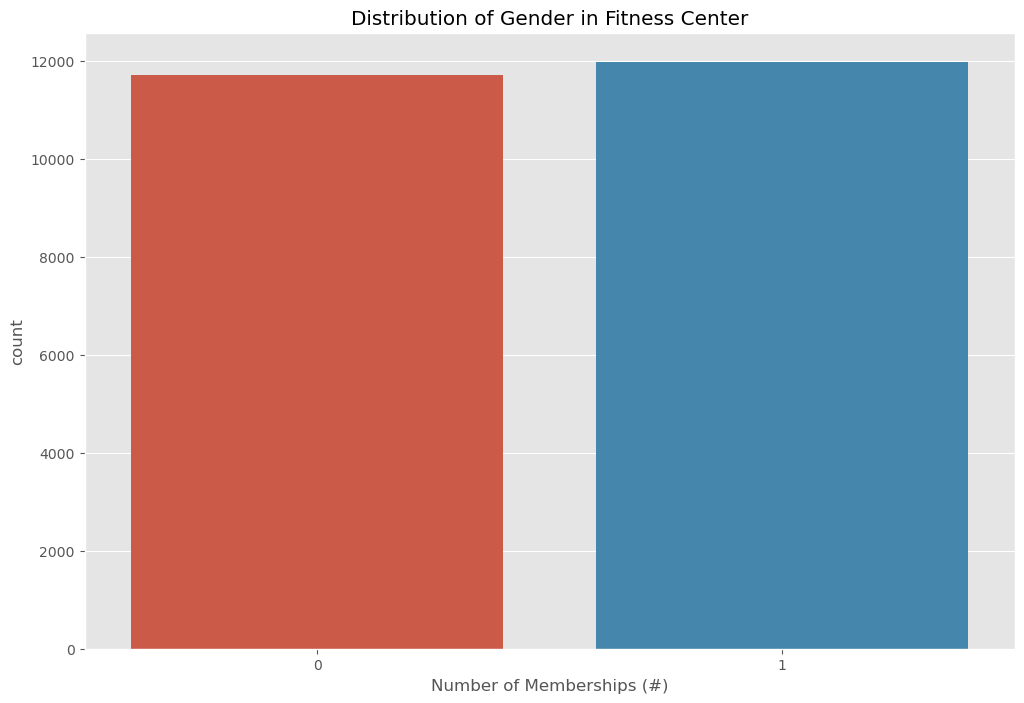

In [18]:
#Seaborn plot of distribution of gender:

sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender in Fitness Center')
plt.xlabel('Number of Memberships (#)')
plt.show()

C:\Users\AnkitGG\AppData\Local\Temp\ipykernel_5812\3169171290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


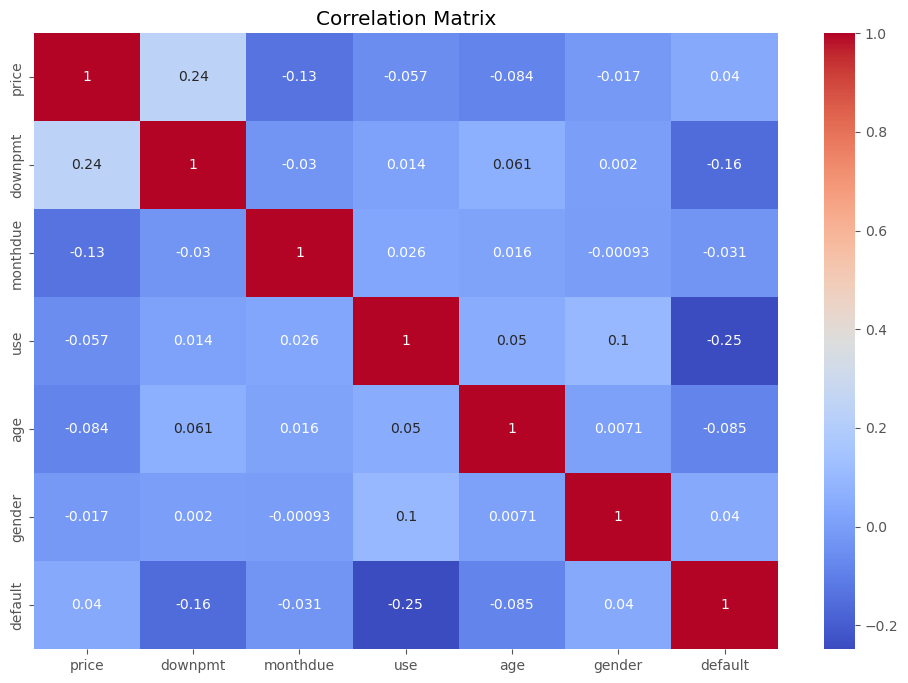

In [19]:
#Correlation Matrix of the Columns in the Dataframe:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

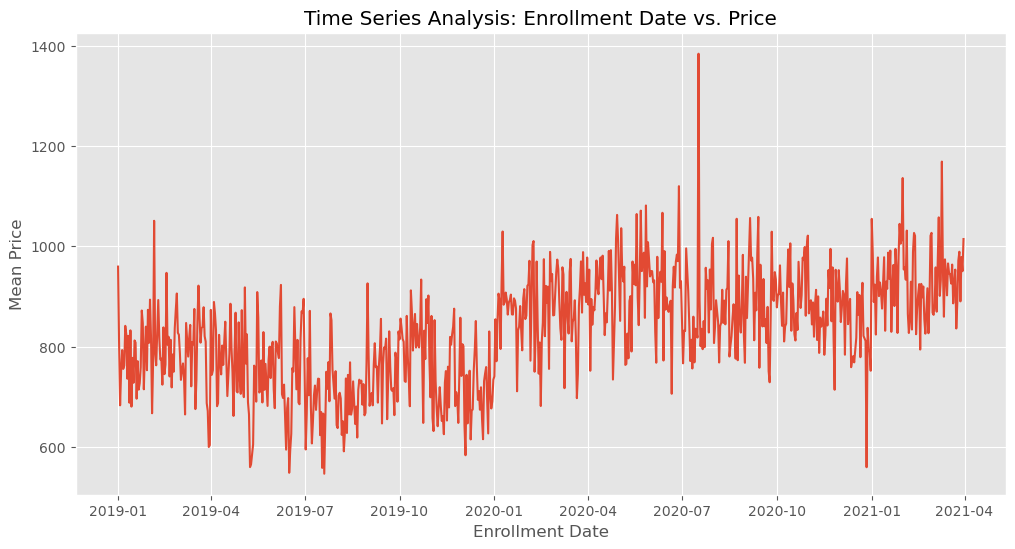

In [22]:
#Time-Series Analysis

price_by_date = df.groupby('enrolldt')['price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(price_by_date.index, price_by_date.values)
plt.title('Time Series Analysis: Enrollment Date vs. Price')
plt.xlabel('Enrollment Date')
plt.ylabel('Mean Price')
plt.show()